# Model Training

#### 1.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
#!pip install catboost

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['math_score'], axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:   ", end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variables:   ", end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variables:   ", end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variables:   ", end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variables:   ", end="")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variables:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variables:   ['none' 'completed']


In [9]:
y = df['math_score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
# Create column transformer with 3 types  of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 151)

In [21]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_train.shape

((800, 151), (800, 151))

#### Create an Evaluate function to give all matrics after model training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate train and test data set
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root mean squared error : {:.4f}".format(model_train_rmse))
    print("- Mean absolute error : {:.4f}".format(model_train_mae))
    print("- R2 score : {:.4f}".format(model_train_r2))
    
    print("--------------------------------------")
    
    print("Model performace for Test set")
    print("- Root mean squared error : {:.4f}".format(model_test_rmse))
    print("- Mean absolute error : {:.4f}".format(model_test_mae))
    print("- R2 score : {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root mean squared error : 7.8301
- Mean absolute error : 6.2872
- R2 score : 0.7280
--------------------------------------
Model performace for Test set
- Root mean squared error : 9.7756
- Mean absolute error : 7.9516
- R2 score : 0.6073


Lasso
Model performance for Training set
- Root mean squared error : 8.6808
- Mean absolute error : 6.9821
- R2 score : 0.6658
--------------------------------------
Model performace for Test set
- Root mean squared error : 8.8751
- Mean absolute error : 7.3635
- R2 score : 0.6763


Ridge
Model performance for Training set
- Root mean squared error : 7.8781
- Mean absolute error : 6.3861
- R2 score : 0.7247
--------------------------------------
Model performace for Test set
- Root mean squared error : 9.2987
- Mean absolute error : 7.6788
- R2 score : 0.6447


K-Neighbors Regressor
Model performance for Training set
- Root mean squared error : 7.5621
- Mean absolute error : 6.0812
- R2 score : 

122:	learn: 8.3264444	total: 813ms	remaining: 5.79s
123:	learn: 8.3238697	total: 820ms	remaining: 5.79s
124:	learn: 8.3188366	total: 826ms	remaining: 5.78s
125:	learn: 8.3169465	total: 831ms	remaining: 5.77s
126:	learn: 8.3159536	total: 837ms	remaining: 5.76s
127:	learn: 8.3113568	total: 844ms	remaining: 5.75s
128:	learn: 8.3085640	total: 849ms	remaining: 5.73s
129:	learn: 8.3076877	total: 854ms	remaining: 5.71s
130:	learn: 8.3062356	total: 859ms	remaining: 5.7s
131:	learn: 8.3034024	total: 865ms	remaining: 5.68s
132:	learn: 8.3013743	total: 870ms	remaining: 5.67s
133:	learn: 8.2982149	total: 875ms	remaining: 5.66s
134:	learn: 8.2945078	total: 881ms	remaining: 5.64s
135:	learn: 8.2918695	total: 886ms	remaining: 5.63s
136:	learn: 8.2911385	total: 892ms	remaining: 5.62s
137:	learn: 8.2895010	total: 898ms	remaining: 5.61s
138:	learn: 8.2853185	total: 903ms	remaining: 5.59s
139:	learn: 8.2832890	total: 909ms	remaining: 5.58s
140:	learn: 8.2810004	total: 914ms	remaining: 5.57s
141:	learn: 8

298:	learn: 7.7833125	total: 1.82s	remaining: 4.26s
299:	learn: 7.7804465	total: 1.82s	remaining: 4.25s
300:	learn: 7.7758892	total: 1.83s	remaining: 4.25s
301:	learn: 7.7709266	total: 1.83s	remaining: 4.24s
302:	learn: 7.7700907	total: 1.84s	remaining: 4.24s
303:	learn: 7.7679811	total: 1.85s	remaining: 4.23s
304:	learn: 7.7642905	total: 1.85s	remaining: 4.22s
305:	learn: 7.7599110	total: 1.86s	remaining: 4.22s
306:	learn: 7.7551242	total: 1.86s	remaining: 4.21s
307:	learn: 7.7492591	total: 1.87s	remaining: 4.2s
308:	learn: 7.7459332	total: 1.88s	remaining: 4.19s
309:	learn: 7.7436712	total: 1.88s	remaining: 4.19s
310:	learn: 7.7428695	total: 1.89s	remaining: 4.18s
311:	learn: 7.7392599	total: 1.89s	remaining: 4.17s
312:	learn: 7.7344537	total: 1.9s	remaining: 4.17s
313:	learn: 7.7298365	total: 1.9s	remaining: 4.16s
314:	learn: 7.7289446	total: 1.91s	remaining: 4.15s
315:	learn: 7.7261585	total: 1.91s	remaining: 4.14s
316:	learn: 7.7223334	total: 1.92s	remaining: 4.13s
317:	learn: 7.7

467:	learn: 7.3265116	total: 2.66s	remaining: 3.03s
468:	learn: 7.3236152	total: 2.67s	remaining: 3.02s
469:	learn: 7.3213292	total: 2.67s	remaining: 3.01s
470:	learn: 7.3191878	total: 2.68s	remaining: 3.01s
471:	learn: 7.3144303	total: 2.68s	remaining: 3s
472:	learn: 7.3118687	total: 2.69s	remaining: 2.99s
473:	learn: 7.3088364	total: 2.69s	remaining: 2.99s
474:	learn: 7.3050161	total: 2.7s	remaining: 2.98s
475:	learn: 7.3028087	total: 2.7s	remaining: 2.97s
476:	learn: 7.3005705	total: 2.7s	remaining: 2.96s
477:	learn: 7.2970089	total: 2.71s	remaining: 2.96s
478:	learn: 7.2955631	total: 2.71s	remaining: 2.95s
479:	learn: 7.2922062	total: 2.72s	remaining: 2.94s
480:	learn: 7.2913642	total: 2.72s	remaining: 2.94s
481:	learn: 7.2895565	total: 2.73s	remaining: 2.93s
482:	learn: 7.2857112	total: 2.73s	remaining: 2.92s
483:	learn: 7.2826892	total: 2.73s	remaining: 2.92s
484:	learn: 7.2782205	total: 2.74s	remaining: 2.91s
485:	learn: 7.2759068	total: 2.74s	remaining: 2.9s
486:	learn: 7.27295

661:	learn: 6.9204237	total: 3.51s	remaining: 1.79s
662:	learn: 6.9183836	total: 3.51s	remaining: 1.79s
663:	learn: 6.9167697	total: 3.52s	remaining: 1.78s
664:	learn: 6.9154368	total: 3.52s	remaining: 1.77s
665:	learn: 6.9116014	total: 3.53s	remaining: 1.77s
666:	learn: 6.9092852	total: 3.53s	remaining: 1.76s
667:	learn: 6.9069994	total: 3.53s	remaining: 1.76s
668:	learn: 6.9046466	total: 3.54s	remaining: 1.75s
669:	learn: 6.9020324	total: 3.54s	remaining: 1.74s
670:	learn: 6.8994382	total: 3.55s	remaining: 1.74s
671:	learn: 6.8967746	total: 3.55s	remaining: 1.73s
672:	learn: 6.8944836	total: 3.55s	remaining: 1.73s
673:	learn: 6.8910314	total: 3.56s	remaining: 1.72s
674:	learn: 6.8906885	total: 3.56s	remaining: 1.71s
675:	learn: 6.8901299	total: 3.56s	remaining: 1.71s
676:	learn: 6.8895431	total: 3.57s	remaining: 1.7s
677:	learn: 6.8860281	total: 3.57s	remaining: 1.7s
678:	learn: 6.8854474	total: 3.58s	remaining: 1.69s
679:	learn: 6.8842709	total: 3.58s	remaining: 1.68s
680:	learn: 6.

859:	learn: 6.5945180	total: 4.36s	remaining: 709ms
860:	learn: 6.5931159	total: 4.36s	remaining: 704ms
861:	learn: 6.5901112	total: 4.36s	remaining: 699ms
862:	learn: 6.5881927	total: 4.37s	remaining: 693ms
863:	learn: 6.5862982	total: 4.37s	remaining: 688ms
864:	learn: 6.5851951	total: 4.38s	remaining: 683ms
865:	learn: 6.5848608	total: 4.38s	remaining: 678ms
866:	learn: 6.5838929	total: 4.38s	remaining: 672ms
867:	learn: 6.5822357	total: 4.39s	remaining: 667ms
868:	learn: 6.5805735	total: 4.39s	remaining: 662ms
869:	learn: 6.5794313	total: 4.39s	remaining: 657ms
870:	learn: 6.5772916	total: 4.4s	remaining: 651ms
871:	learn: 6.5764757	total: 4.4s	remaining: 646ms
872:	learn: 6.5760590	total: 4.41s	remaining: 641ms
873:	learn: 6.5746927	total: 4.41s	remaining: 636ms
874:	learn: 6.5729582	total: 4.41s	remaining: 631ms
875:	learn: 6.5715765	total: 4.42s	remaining: 625ms
876:	learn: 6.5699024	total: 4.42s	remaining: 620ms
877:	learn: 6.5694670	total: 4.43s	remaining: 615ms
878:	learn: 6.

### Result

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.677411
1,Lasso,0.676304
2,Ridge,0.644670
7,CatBoosting Regressor,0.625026
0,Linear Regression,0.607282
3,K-Neighbors Regressor,0.584366
5,Random Forest Regressor,0.568562
6,XGBoost Regressor,0.549716
4,Decision Tree,0.440536


### Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuraccy of the model is %.2f" %score)

Accuraccy of the model is 0.61


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

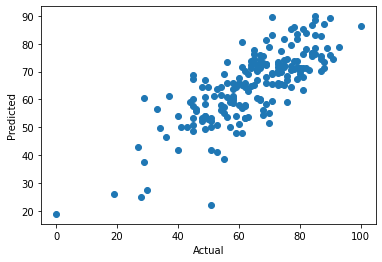

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:xlabel='math_score'>

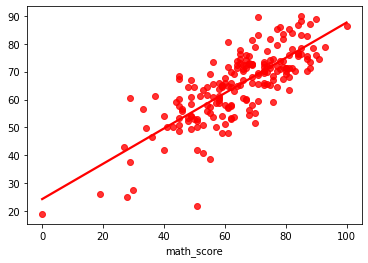

In [34]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference between actual and predicted values

In [35]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,74.631637,16.368363
737,53,63.609941,-10.609941
740,80,70.367690,9.632310
660,74,69.816802,4.183198
411,84,75.491981,8.508019
...,...,...,...
408,52,61.257068,-9.257068
332,62,53.202271,8.797729
208,74,77.496754,-3.496754
613,65,72.962664,-7.962664
